# EDA

## Imports

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("../data/ReFED_US_Food_Surplus_Detail.csv")

## Data Cleaning

In [51]:
df.shape

(11752, 29)

In [52]:
df.head()

,year,sector,sub_sector,sub_sector_category,food_type,food_category,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,...,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,2022,Farm,Not Applicable,Not Applicable,Dry Goods,Nuts And Seeds,1.697411e+05,5.675411e+06,2.044225e+08,1.697411e+05,...,0.000000,0.0,0.000000,0.0,0.000000,711758.105900,34.932795,711793.038700,9.594215e+10,2.829019e+08
1,2022,Farm,Not Applicable,Not Applicable,Dry Goods,"Pickles, Olives, And Pickled Vegetables",1.759466e+03,7.137274e+04,1.592708e+06,1.697192e+03,...,0.065901,0.0,2.336496,0.0,22.050607,7368.418851,-6.554829,7361.864022,9.932335e+08,2.924994e+06
2,2022,Farm,Not Applicable,Not Applicable,Produce,Apples,2.754374e+06,7.201575e+06,1.764610e+09,2.169203e+06,...,2513.788476,0.0,20060.812450,0.0,207202.855800,576130.543200,54798.416040,630928.959200,8.814583e+10,4.520624e+09
3,2022,Farm,Not Applicable,Not Applicable,Produce,Apricots,1.220409e+04,3.828162e+04,1.206312e+07,9.641038e+03,...,3.105164,0.0,95.771389,0.0,907.546681,2552.944889,240.881673,2793.826562,3.905911e+08,2.003354e+07
4,2022,Farm,Not Applicable,Not Applicable,Produce,Artichokes,3.942489e+03,3.957525e+04,4.730987e+06,2.870689e+03,...,1.084586,0.0,38.453500,0.0,380.901212,823.053131,50.432661,873.485791,1.259241e+08,6.445403e+06


In [53]:
df.isnull().sum()

year                                  0
sector                                0
sub_sector                            0
sub_sector_category                   0
food_type                             0
food_category                         0
tons_surplus                          0
tons_supply                           0
us_dollars_surplus                    0
tons_waste                            0
tons_uneaten                          0
tons_inedible_parts                   0
tons_not_fit_for_human_consumption    0
tons_donated                          0
tons_biomaterial_processing           0
tons_animal_feed                      0
tons_anaerobically_digested           0
tons_composted                        0
tons_not_harvested                    0
tons_incinerated                      0
tons_land_application                 0
tons_landfilled                       0
tons_sewer                            0
tons_refuse_discards                  0
upstream_mtco2e_footprint             0


In [54]:
df.dtypes

year                                    int64
sector                                 object
sub_sector                             object
sub_sector_category                    object
food_type                              object
food_category                          object
tons_surplus                          float64
tons_supply                           float64
us_dollars_surplus                    float64
tons_waste                            float64
tons_uneaten                          float64
tons_inedible_parts                   float64
tons_not_fit_for_human_consumption    float64
tons_donated                          float64
tons_biomaterial_processing           float64
tons_animal_feed                      float64
tons_anaerobically_digested           float64
tons_composted                        float64
tons_not_harvested                    float64
tons_incinerated                      float64
tons_land_application                 float64
tons_landfilled                   

In [55]:
columns_to_drop = ["sub_sector", "sub_sector_category", "food_category", "upstream_mtco2e_footprint", "downstream_mtco2e_footprint"]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

The first three dropped columns are logically the least directly-related categories to the amount of CO2 emission, while the upstream and downstream MT CO2e footprints are aggregated in another value. As for the other two categorical variables, sector would determine possible spoilage practices and food_type would be potentially indicative of shelf life.

In [56]:
df.head()

,year,sector,food_type,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,tons_uneaten,tons_inedible_parts,tons_not_fit_for_human_consumption,...,tons_composted,tons_not_harvested,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,2022,Farm,Dry Goods,1.697411e+05,5.675411e+06,2.044225e+08,1.697411e+05,1.697411e+05,0.000000,8.291764e+04,...,0.0,1.697411e+05,0.000000,0.0,0.000000,0.0,0.000000,711793.038700,9.594215e+10,2.829019e+08
1,2022,Farm,Dry Goods,1.759466e+03,7.137274e+04,1.592708e+06,1.697192e+03,1.754997e+03,0.000000,8.444716e+02,...,0.0,1.672739e+03,0.065901,0.0,2.336496,0.0,22.050607,7361.864022,9.932335e+08,2.924994e+06
2,2022,Farm,Produce,2.754374e+06,7.201575e+06,1.764610e+09,2.169203e+06,2.712374e+06,275437.430500,1.462724e+06,...,0.0,1.939425e+06,2513.788476,0.0,20060.812450,0.0,207202.855800,630928.959200,8.814583e+10,4.520624e+09
3,2022,Farm,Produce,1.220409e+04,3.828162e+04,1.206312e+07,9.641038e+03,1.202013e+04,854.285977,6.462121e+03,...,0.0,8.634615e+03,3.105164,0.0,95.771389,0.0,907.546681,2793.826562,3.905911e+08,2.003354e+07
4,2022,Farm,Produce,3.942489e+03,3.957525e+04,4.730987e+06,2.870689e+03,3.867242e+03,2365.493625,2.544075e+03,...,0.0,2.450250e+03,1.084586,0.0,38.453500,0.0,380.901212,873.485791,1.259241e+08,6.445403e+06


In [57]:
df = pd.get_dummies(df, columns=['sector', 'food_type'], dtype=int)

Use get_dummies to turn sector and food_type into usable numerical features that will be helpful for determining how different sectors deal with food surplus and which kinds of surplus food are disposed of in what ways.

In [58]:
df["tons_productive_surplus"] = df[["tons_donated", "tons_composted", "tons_anaerobically_digested", "tons_land_application", "tons_biomaterial_processing", "tons_animal_feed"]].sum(axis=1)

Creates an aggregate column for all ways of processing surplus food in ways that would be considered productive rather than simply disposing of the food.

In [59]:
df.head()

,year,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,tons_uneaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,tons_biomaterial_processing,...,sector_Retail,food_type_Breads & Bakery,food_type_Dairy & Eggs,food_type_Dry Goods,food_type_Fresh Meat & Seafood,food_type_Frozen,food_type_Prepared Foods,food_type_Produce,food_type_Ready-To-Drink Beverages,tons_productive_surplus
0,2022,1.697411e+05,5.675411e+06,2.044225e+08,1.697411e+05,1.697411e+05,0.000000,8.291764e+04,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,0.000000
1,2022,1.759466e+03,7.137274e+04,1.592708e+06,1.697192e+03,1.754997e+03,0.000000,8.444716e+02,4.469649,0.0,...,0,0,0,1,0,0,0,0,0,62.274196
2,2022,2.754374e+06,7.201575e+06,1.764610e+09,2.169203e+06,2.712374e+06,275437.430500,1.462724e+06,41999.936570,0.0,...,0,0,0,0,0,0,0,1,0,585171.713770
3,2022,1.220409e+04,3.828162e+04,1.206312e+07,9.641038e+03,1.202013e+04,854.285977,6.462121e+03,183.959352,0.0,...,0,0,0,0,0,0,0,1,0,2563.046946
4,2022,3.942489e+03,3.957525e+04,4.730987e+06,2.870689e+03,3.867242e+03,2365.493625,2.544075e+03,75.247693,0.0,...,0,0,0,0,0,0,0,1,0,1071.800077


In [60]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")

In [61]:
df.dtypes

year                                    int64
tons_surplus                          float64
tons_supply                           float64
us_dollars_surplus                    float64
tons_waste                            float64
tons_uneaten                          float64
tons_inedible_parts                   float64
tons_not_fit_for_human_consumption    float64
tons_donated                          float64
tons_biomaterial_processing           float64
tons_animal_feed                      float64
tons_anaerobically_digested           float64
tons_composted                        float64
tons_not_harvested                    float64
tons_incinerated                      float64
tons_land_application                 float64
tons_landfilled                       float64
tons_sewer                            float64
tons_refuse_discards                  float64
total_mtco2e_footprint                float64
gallons_water_footprint               float64
meals_wasted                      

In [62]:
df.to_csv("../../part_03/data/clean_us_food_waste.csv", index=False)

## Time Series Analysis

In [63]:
df_time = df.groupby("year").sum()

Creates a dataframe where the key features that will be used for analysis and modeling purposes are grouped by the index "year".

In [64]:
df_time

,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,tons_uneaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,tons_biomaterial_processing,tons_animal_feed,...,sector_retail,food_type_breads_&_bakery,food_type_dairy_&_eggs,food_type_dry_goods,food_type_fresh_meat_&_seafood,food_type_frozen,food_type_prepared_foods,food_type_produce,food_type_ready-to-drink_beverages,tons_productive_surplus
year,,,,,,,,,,,,,,,,,,,,,
2010,7.567334e+07,7.786356e+08,3.147669e+11,6.667039e+07,7.436668e+07,1.633567e+07,4.182241e+07,1.306666e+06,7.517000e+05,6.944584e+06,...,291,72,60,204,98,102,94,228,46,2.679681e+07
2011,7.823870e+07,8.268699e+08,3.295169e+11,6.858291e+07,7.684391e+07,1.725019e+07,4.359882e+07,1.394796e+06,8.210120e+05,7.439984e+06,...,291,72,60,204,98,102,94,228,46,2.832769e+07
2012,7.953590e+07,8.425259e+08,3.392724e+11,6.954229e+07,7.808181e+07,1.751045e+07,4.398496e+07,1.454093e+06,8.381689e+05,7.701352e+06,...,291,72,60,204,98,102,94,228,46,2.886964e+07
2013,8.178941e+07,8.686340e+08,3.543272e+11,7.129801e+07,8.026514e+07,1.813012e+07,4.525830e+07,1.524272e+06,8.842812e+05,8.082848e+06,...,291,72,60,204,98,102,94,228,46,3.004776e+07
2014,8.381308e+07,9.055192e+08,3.645029e+11,7.300391e+07,8.221604e+07,1.887177e+07,4.639673e+07,1.597042e+06,9.457685e+05,8.266360e+06,...,291,72,60,204,98,102,94,228,46,3.118511e+07
2015,8.358954e+07,8.921382e+08,3.655756e+11,7.290885e+07,8.196111e+07,1.870540e+07,4.607687e+07,1.628427e+06,9.456767e+05,8.106583e+06,...,291,72,60,204,98,102,94,228,46,3.112043e+07
2016,8.611454e+07,9.071376e+08,3.743210e+11,7.510675e+07,8.441153e+07,1.898290e+07,4.697158e+07,1.703008e+06,9.351020e+05,8.369674e+06,...,291,72,60,204,98,102,94,228,46,3.131102e+07
2017,8.587700e+07,9.014467e+08,3.833355e+11,7.486990e+07,8.414471e+07,1.913107e+07,4.669806e+07,1.732289e+06,9.030739e+05,8.371735e+06,...,291,72,60,204,98,102,94,228,46,3.126088e+07
2018,8.925304e+07,9.424270e+08,3.945963e+11,7.800990e+07,8.736770e+07,1.947900e+07,4.757005e+07,1.885348e+06,1.045803e+06,8.311991e+06,...,291,72,60,204,98,102,94,228,46,3.265045e+07


In [65]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    plt.figure(figsize=(18,9))
    
    for col in cols:
            
        plt.plot(df[col])
        
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

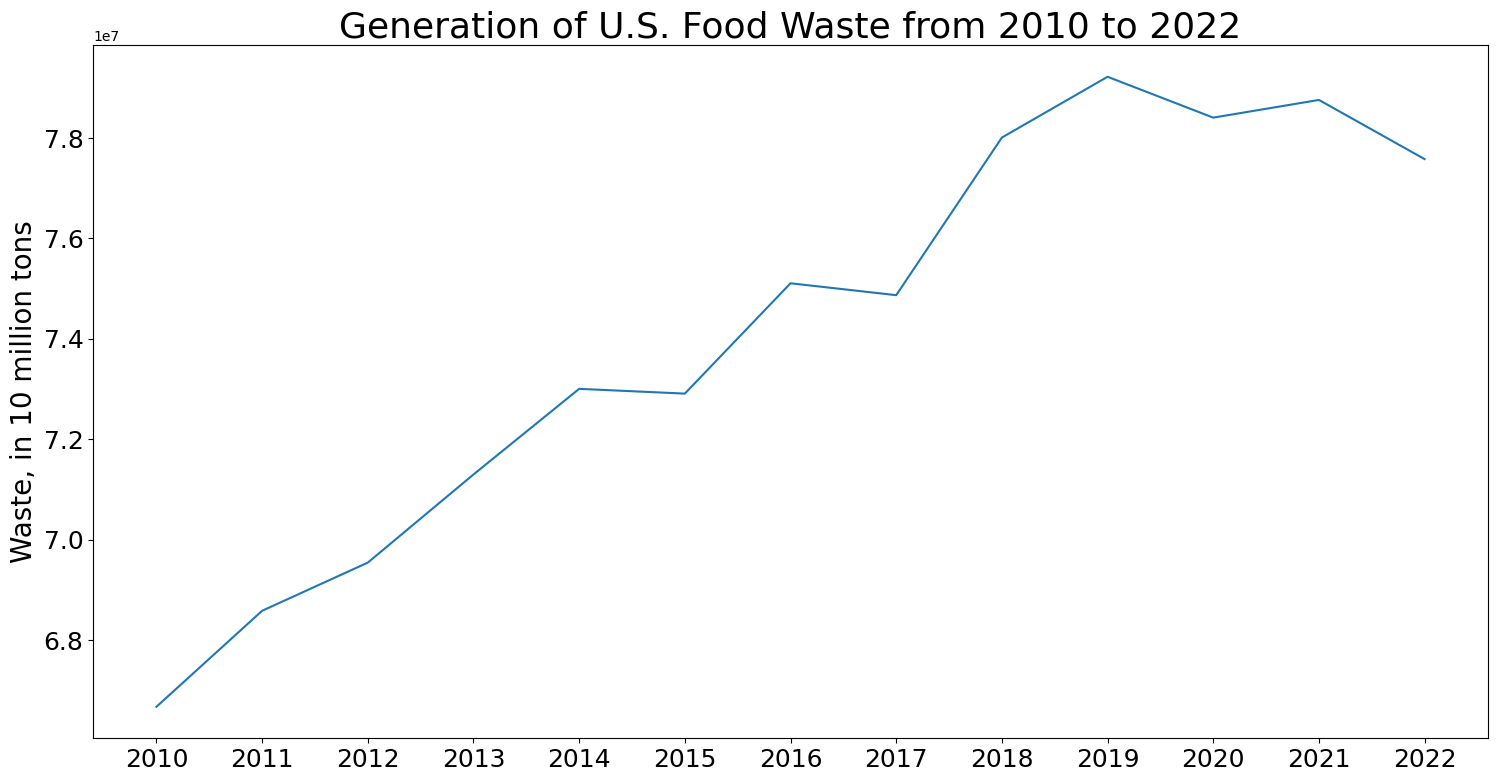

In [66]:
plot_series(df_time, ["tons_waste"], title="Generation of U.S. Food Waste from 2010 to 2022", ylab="Waste, in 10 million tons")